In [6]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
import tflearn 
from tflearn.layers.conv import conv_2d, max_pool_2d 
from tflearn.layers.core import input_data, dropout, fully_connected 
from tflearn.layers.estimator import regression 

C:\Users\nemat\Anaconda3\envs\hrd\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nemat\Anaconda3\envs\hrd\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nemat\Anaconda3\envs\hrd\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nemat\Anaconda3\envs\hrd\lib\site-packages\tensorflow\python\framework

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [51]:
import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1
    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)





In [209]:
train_data=pd.read_csv('train.csv')
train_data.shape


(4178, 2)

In [210]:
def gettraindata():
    train_data=pd.read_csv('train.csv')
    trdata=[]
    for i in range(4178):
        label=[0]*7
        label[np.array(train_data)[i,0]]=1
        str1=np.array(train_data)[i,1]
        str1=str1.split(" ")
        for j in range(48*48):
            str1[j]=int(str1[j])
        str1=np.array(str1)
        str1=np.reshape(str1,(48,48))
        trdata.append([str1,label])
        np.save('train_data.npy', trdata)
        #print("done",i, "of 4178")
        update_progress(i /4178)
    print("complete..")
    return trdata

In [49]:
def gettestdata():
    test_data=pd.read_csv('test.csv')
    tstdata=[]
    for i in range(13):
        str1=np.array(test_data)[i,0]
        str1=str1.split(" ")
        for i in range(48*48):
            str1[i]=int(str1[i])
        str1=np.array(str1)
        str1=np.reshape(str1,(48,48))
        tstdata.append(str1)
        np.save('test_data.npy', tstdata)
        print(i, "of 1312")
        update_progress(i /13)
    return tstdata

In [7]:
IMG_SIZE=48
LR=1e-3
import tflearn 
from tflearn.layers.conv import conv_2d, max_pool_2d 
from tflearn.layers.core import input_data, dropout, fully_connected 
from tflearn.layers.estimator import regression 
  
import tensorflow as tf 
tf.reset_default_graph() 
convnet = input_data(shape =[None, IMG_SIZE, IMG_SIZE, 1], name ='input') 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 128, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = fully_connected(convnet, 1024, activation ='relu') 
convnet = dropout(convnet, 0.8) 
  
convnet = fully_connected(convnet, 7, activation ='softmax') 
convnet = regression(convnet, optimizer ='adam', learning_rate = LR, 
      loss ='categorical_crossentropy', name ='targets') 
  
model = tflearn.DNN(convnet, tensorboard_dir ='log') 

W1029 21:10:04.074991 13580 deprecation_wrapper.py:119] From C:\Users\nemat\Anaconda3\envs\hrd\lib\site-packages\tflearn\layers\core.py:81: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1029 21:10:04.078988 13580 deprecation.py:506] From C:\Users\nemat\Anaconda3\envs\hrd\lib\site-packages\tflearn\initializations.py:119: calling UniformUnitScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1029 21:10:04.079980 13580 deprecation.py:323] From C:\Users\nemat\Anaconda3\envs\hrd\lib\site-packages\tensorflow\python\util\deprecation.py:507: UniformUnitScaling.__init__ (from tensorflow.python.ops.init_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equiva

In [214]:
train_data=gettraindata()
test_data=gettestdata()

Progress: [####################] 100.0%


In [215]:
train = train_data[:3500] 
test = train_data[3500:] 

In [216]:
X = np.array([i[0] for i in train]).reshape(-1, 48, 48, 1) 
Y = [i[1] for i in train] 
test_x = np.array([i[0] for i in test]).reshape(-1, 48, 48, 1) 
test_y = [i[1] for i in test] 

In [112]:
Y=np.array(Y)
Y.shape
Y1=Y

In [218]:
MODEL_NAME = 'emotion-{}-{}.model'.format(1e-3, '6conv-basic') 
model.fit({'input': X}, {'targets': Y}, n_epoch = 100,  
    validation_set =({'input': test_x}, {'targets': test_y}),  
          snapshot_step = 100,show_metric=True) 
model.save(MODEL_NAME) 

Training Step: 6049  | total loss: 0.02980 | time: 6.453s
| Adam | epoch: 110 | loss: 0.02980 - acc: 0.9941 -- iter: 3456/3500
Training Step: 6050  | total loss: 0.03252 | time: 7.562s
| Adam | epoch: 110 | loss: 0.03252 - acc: 0.9931 | val_loss: 1.65114 - val_acc: 0.8127 -- iter: 3500/3500
--


In [8]:
MODEL_NAME = 'emotion-{}-{}.model'.format(1e-3, '6conv-basic')
model.load(MODEL_NAME)
model.save('finalmodel')

W1029 21:10:11.106724 13580 deprecation.py:323] From C:\Users\nemat\Anaconda3\envs\hrd\lib\site-packages\tensorflow\python\training\saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [169]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

TypeError: can't pickle _thread.RLock objects

Progress: [####################] 100.0%
[2.9911537e-06, 8.42887e-07, 9.3555246e-07, 5.863134e-06, 3.9915078e-05, 7.483246e-06, 0.99994195]
6


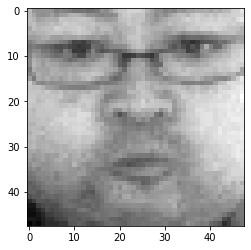

In [58]:
import matplotlib.pyplot as plt 
test_data = np.load('test_data.npy') 
img=cv2.imread('images.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
arr=gettestdata()
img=np.array(arr[12])
#img=img[80:240,70:180]
img=cv2.resize(img,(48,48))
img1=img
img=img.reshape(48,48,1)
model_out=model.predict([img])

model_out=list(model_out[0])
print(model_out)
print(model_out.index(max(model_out)))
plt.imshow(img1,cmap="gray")

0 [1, 0, 0, 0, 0, 0, 0]
1 [0, 0, 0, 0, 0, 0, 1]
2 [0, 0, 0, 0, 0, 0, 1]
3 [0, 0, 0, 0, 0, 1, 0]
4 [0, 1, 0, 0, 0, 0, 0]
5 [1, 0, 0, 0, 0, 0, 0]
6 [0, 0, 0, 0, 0, 0, 1]
7 [0, 0, 0, 0, 1, 0, 0]
8 [0, 0, 0, 0, 0, 1, 0]
9 [0, 0, 0, 0, 0, 0, 1]
10 [0, 0, 0, 0, 0, 1, 0]
11 [0, 0, 0, 0, 0, 1, 0]
12 [0, 0, 0, 0, 0, 0, 1]
13 [0, 0, 0, 0, 0, 1, 0]
14 [0, 0, 0, 0, 0, 1, 0]
15 [0, 0, 0, 0, 0, 1, 0]
16 [0, 0, 0, 0, 1, 0, 0]
17 [0, 0, 0, 0, 0, 0, 1]
18 [0, 0, 0, 0, 0, 1, 0]
19 [0, 0, 0, 0, 1, 0, 0]


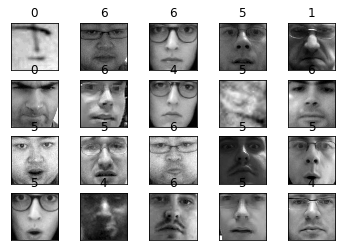

In [40]:

fig = plt.figure() 
i=0
for num, data in enumerate(test_data[:20]):  
    img_data = data 
      
   # y = fig.add_subplot(4, 5, num + 1) 
    orig = img_data 
    data = img_data.reshape(48, 48, 1) 
  
    # model_out = model.predict([data])[0] 
    model_out = model.predict([data])
    a1rr=[0]*7
    y = fig.add_subplot(4, 5, num + 1) 
    #print(model_out)
    model_out=list(model_out[0])
    a1rr[model_out.index(max(model_out))]=1
    y.imshow(orig, cmap ='gray') 
    #fig = plt.figure() 
    print(i,a1rr)
    i=i+1
    plt.title(model_out.index(max(model_out))) 
    y.axes.get_xaxis().set_visible(False) 
    y.axes.get_yaxis().set_visible(False) 
plt.show() 


In [158]:
plt.imshow(,cmap="gray")

NameError: name 'str1' is not defined

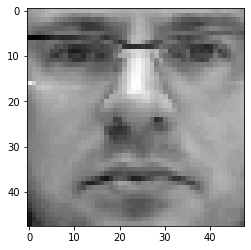

In [185]:
plt.imshow(test_data[19],cmap="gray")


In [40]:
np.reshape(arr,(2,3))

array([[1, 2, 3],
       [4, 5, 6]])

In [4]:
import numpy as np
img = np.zeros([512,512,3])
img.shape

(512, 512, 3)

In [137]:
arr=[0.2,0.7,0.8,0.3,0.5,0.1,0.4]

In [139]:
brr=[0]*7
brr[arr.index(max(arr))]=1

In [3]:
model = tflearn.DNN(convnet, tensorboard_dir ='log') 

NameError: name 'convnet' is not defined

In [14]:
image=cv2.imread('me.jpg')
img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(48,48))
cv2.imshow('3',img)

In [ ]:
anger=0, disgust=1, fear=2, happy=3, sad=4, surprise=5, neutral=6)